# Prédiction des prix de l'immobilier à Boston dans les années 1970 avec Tensorflow

## 1. Importation des modules

In [1]:
from keras.datasets import boston_housing
from keras.models import Sequential
from keras import layers
import matplotlib.pyplot as plt

## 2. Importation des données

In [2]:
(xtrain, ytrain), (xtest, ytest) = boston_housing.load_data ()

mean = xtrain.mean (axis = 0)
xtrain -= mean

std = xtrain.std (axis = 0)
xtrain/= std

xtest -= mean
xtest /= std

xtest.shape

(102, 13)

## 3. Création du modèle

In [3]:
model = Sequential ()

model.add (layers.Input (shape = (13,)))
model.add (layers.Dense (64, activation = "relu"))
model.add (layers.Dense (64, activation = "relu"))
model.add (layers.Dense (1))

model.summary ()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Entrainement du modèle

In [4]:
model.compile (optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])

history = model.fit (xtrain, ytrain, epochs = 100, validation_data = (xtest, ytest))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 556.1275 - mae: 21.9085 - val_loss: 528.9803 - val_mae: 21.2061
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 473.4360 - mae: 19.7677 - val_loss: 433.8309 - val_mae: 18.9720
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 353.3583 - mae: 16.9263 - val_loss: 320.1084 - val_mae: 16.0052
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 278.9354 - mae: 14.8515 - val_loss: 214.5083 - val_mae: 12.8457
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 164.1469 - mae: 11.0031 - val_loss: 126.8728 - val_mae: 9.6593
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 99.0733 - mae: 8.1219 - val_loss: 78.5048 - val_mae: 7.4201
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 65.3203 - mae: 6.0908 - val_loss: 53.8067 - val_mae: 6.0111
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 47.5245 - mae: 5.2975 - val_loss: 40.4400 - val_mae: 5.0806
Epoch 9/100
13/13 ━━━━━━━━━

## 5. Visualisation des performances

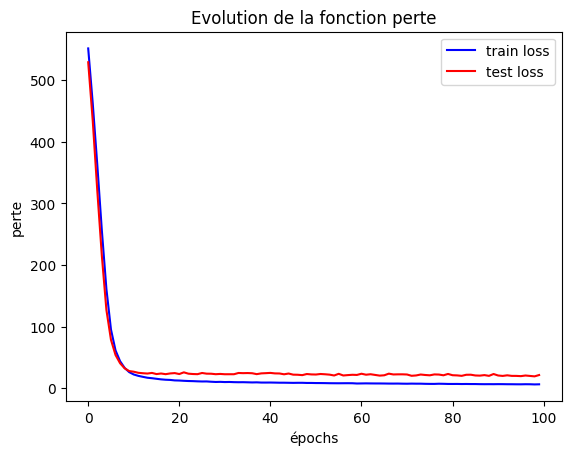

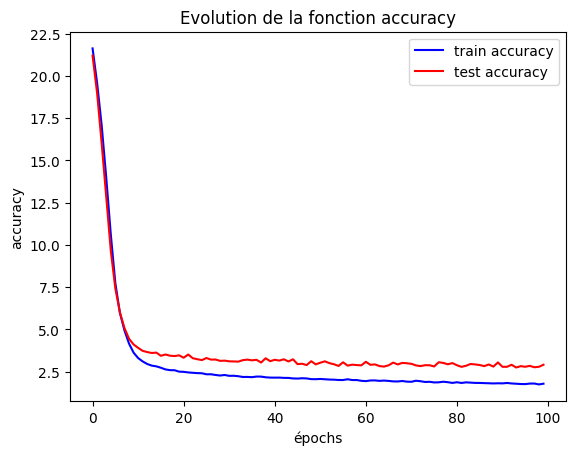

In [5]:
trainloss = history.history ["loss"]
testloss = history.history ["val_loss"]
trainaccuracy = history.history ["mae"]
testaccuracy = history.history ["val_mae"]

plt.plot (range (100), trainloss, "b", label = "train loss")
plt.plot (range (100), testloss, "r", label = "test loss")
plt.title ("Evolution de la fonction perte")
plt.xlabel ("épochs")
plt.ylabel ("perte")
plt.legend ()
plt.show ()

plt.plot (range (100), trainaccuracy, "b", label = "train accuracy")
plt.plot (range (100), testaccuracy, "r", label = "test accuracy")
plt.title ("Evolution de la fonction accuracy")
plt.xlabel ("épochs")
plt.ylabel ("accuracy")
plt.legend ()
plt.show ()

## 6. Visualisation des résultats

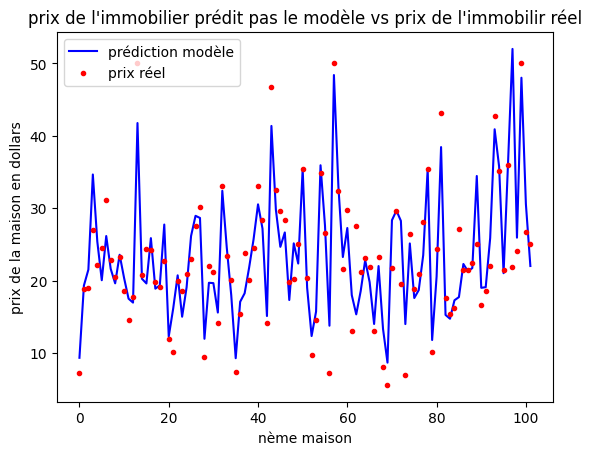

In [6]:
ypred = model.predict (xtest, verbose = 0)

plt.plot (range (102), ypred, 'b', label = "prédiction modèle")
plt.plot (range (102), ytest, 'r.', label = "prix réel")
plt.title ("prix de l'immobilier prédit pas le modèle vs prix de l'immobilir réel")
plt.xlabel ("nème maison")
plt.ylabel ("prix de la maison en dollars")
plt.legend ()
plt.show ()

## 7. Validation du modèle

In [7]:
loss, accuracy = model.evaluate (xtest, ytest)
print (" ")
print (f"Le modèle a en moyenne un écart de {int (accuracy*1000)} $ par rapport au prix exact")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 15.5525 - mae: 2.7225
 
Le modèle a en moyenne un écart de 2907 $ par rapport au prix exact


In [8]:
error = abs (ypred.squeeze ()-ytest)
print (error.mean ())

print (f"On retrouve bien la métrique mae : mean absolute error")

2.907370911392511
On retrouve bien la métrique mae : mean absolute error
